In [120]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [125]:
df = pd.read_csv('List of epidemics - data.csv')

In [126]:
# rename cols 
df.columns = ['event', 'date', 'year', 'duration', 'location', 'disease', 'pathogen_type',
              'death_toll_str', 'death_toll', 'ref']

# change nans, edit types
df = df.fillna(float('NaN'))
df['death_toll'] = df['death_toll'].apply(lambda row: float(row.replace(',', ''))
                                                            if isinstance(row, str) else row)

# add decade col
df['decade'] = df['year'].apply(lambda row: int(row/100)*100 if not math.isnan(row) else row)

In [132]:
df.head()
df.dtypes

,event,date,year,duration,location,disease,pathogen_type,death_toll_str,death_toll,ref,decade
0,1200 BC Babylon influenza epidemic,1200 BC,-1200.0,1.0,"Babylon, or Babirus of the Persians, Central A...",Sanskrit scholars found records of a disease r...,NaN,Unknown,NaN,[2],-1200.0
1,Plague of Athens,429–426 BC,-427.0,3.0,"Greece, Libya, Egypt, Ethiopia","Unknown, possibly typhus, typhoid fever or vir...",NaN,"75,000–100,000",87500.0,[3][4][5][6],-400.0
2,412 BC epidemic,412 BC,-412.0,1.0,"Greece (Northern Greece, Roman Republic)","Unknown, possibly influenza",NaN,Unknown,NaN,[7],-400.0
3,Antonine Plague,165–180 (possibly up to 190),172.0,15.0,Roman Empire,"Unknown, possibly smallpox",NaN,5–10 million,7500000.0,[8],100.0
4,Plague of Cyprian,250–266,258.0,16.0,Europe,"Unknown, possibly smallpox",NaN,1 million+,1000000.0,[9][10],200.0


event              object
date               object
year              float64
duration          float64
location           object
disease            object
pathogen_type      object
death_toll_str     object
death_toll        float64
ref                object
decade            float64
dtype: object

In [133]:
max(df.death_toll)

nan

<Figure size 1152x360 with 0 Axes>

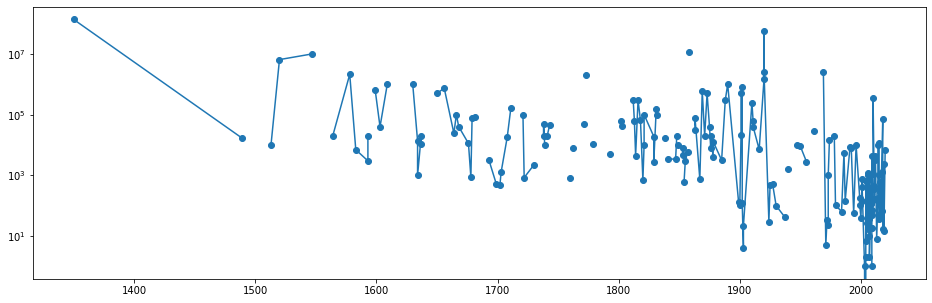

In [134]:
plt.figure(figsize=(16,5))

df_tmp = df[df.year > 1300].sort_values('year')

plt.semilogy(df_tmp.year, df_tmp.death_toll, marker='o')

plt.show()

In [157]:
df[df.decade==1500]

,event,date,year,duration,location,disease,pathogen_type,death_toll_str,death_toll,ref,decade
14,Sweating sickness (multiple outbreaks),1485–1551,1513.0,76.0,Britain (England) and later continental Europe,"Unknown, possibly an unknown species of hantav...",NaN,"10,000+",10000.0,[21],1500.0
16,1510 influenza pandemic,1510,1510.0,1.0,"Asia, North Africa, Europe",Influenza,virus,"Unknown, around 1% of those infected",NaN,[23],1500.0
17,1520 Mexico smallpox epidemic,1519–1520,1520.0,2.0,Mexico,Smallpox,virus,5–8 million (40% of population),6500000.0,[24],1500.0
18,Cocoliztli Epidemic of 1545–1548,1545–1548,1547.0,3.0,Mexico,Possibly Salmonella enterica,NaN,5–15 million (80% of population),10000000.0,[25][26][27][28],1500.0
19,1557 influenza pandemic,1557–59,1558.0,2.0,"Asia, Africa, Europe, and Americas",Influenza,virus,Unknown,NaN,NaN,1500.0
20,1561 Chile smallpox epidemic,1561–1562,1562.0,2.0,Chile,Smallpox,virus,Unknown (20-25% of native population),NaN,[29],1500.0
21,1563 London plague,1563–1564,1564.0,2.0,"London, England",Bubonic plague,bacterium,"20,100+",20100.0,[30],1500.0
22,Cocoliztli epidemic of 1576,1576–1580,1578.0,4.0,Mexico,Possibly Salmonella enterica,NaN,2–2.5 million (50% of population),2125000.0,[25][26][27][28],1500.0
23,1582 Tenerife plague epidemic,1582–1583,1583.0,2.0,"Tenerife, Spain",Bubonic plague,bacterium,"5,000–9,000",7000.0,[31],1500.0
24,1592–1596 Seneca nation measles epidemic,1592–1596,1594.0,4.0,"Seneca nation, North America",Measles,virus,Unknown,NaN,[32],1500.0


In [158]:
df.groupby('decade').agg({
    'death_toll': [ 'count', 'sum', 'mean']
})

death_toll                           
             count          sum          mean
decade                                       
-1200.0          0          0.0           NaN
-400.0           1      87500.0  8.750000e+04
 100.0           1    7500000.0  7.500000e+06
 200.0           1    1000000.0  1.000000e+06
 500.0           1   40000000.0  4.000000e+07
 600.0           1      25000.0  2.500000e+04
 700.0           1    2000000.0  2.000000e+06
 1300.0          1  137500000.0  1.375000e+08
 1400.0          1      17000.0  1.700000e+04
 1500.0          9   19335000.0  2.148333e+06
 1600.0         18    3669055.0  2.038364e+05
 1700.0         18    2506379.0  1.392433e+05
 1800.0         40   15909761.0  3.977440e+05
 1900.0         41   66802396.0  1.629327e+06
 2000.0         59     489857.0  8.302661e+03

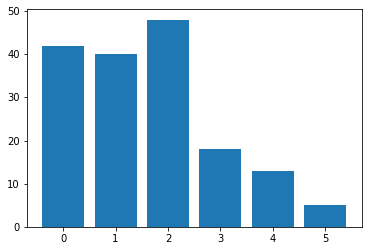

In [150]:
x = [1000, 10000, 100000, 1000000, 10000000, 100000000]
y = [len(df[(df.death_toll >= 100) & (df.death_toll < 1000)]),
     len(df[(df.death_toll >= 1000) & (df.death_toll < 10000)]),
     len(df[(df.death_toll >= 10000) & (df.death_toll < 100000)]),
     len(df[(df.death_toll >= 100000) & (df.death_toll < 1000000)]),
     len(df[(df.death_toll >= 1000000) & (df.death_toll < 10000000)]),
     len(df[(df.death_toll >= 10000000) & (df.death_toll < 100000000)])
    ]

x, y

plt.bar(range(len(x)), y)
plt.show();

In [146]:
len(df), sum(y), len(df[~df.death_toll.isna()])

(257, 166, 205)

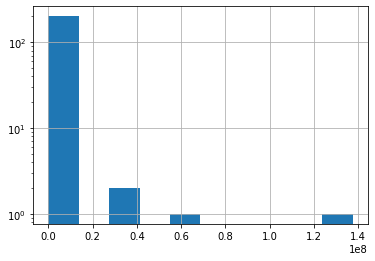

In [152]:
ax = df['death_toll'].hist()

ax.set_yscale('log')

(1000, 100000000)

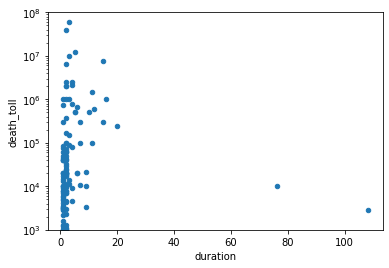

In [185]:

df.plot.scatter('duration', 'death_toll', logy=True)

plt.ylim([1000, 100000000])

In [175]:
df[df.duration == 108]
df.iloc[118]

,event,date,year,duration,location,disease,pathogen_type,death_toll_str,death_toll,ref,decade
143,Papua New Guinea kuru epidemic,1901–2009,1955.0,108.0,Papua New Guinea,Kuru,NaN,"2,700–3,000+",2850.0,[152][153],1900.0


event                     Third plague pandemic
date                                  1855–1960
year                                       1858
duration                                      5
location                              Worldwide
disease                          Bubonic plague
pathogen_type                         bacterium
death_toll_str    12 million+ (India and China)
death_toll                              1.2e+07
ref                                  [127][128]
decade                                     1800
Name: 118, dtype: object

In [171]:
max(df.duration)

108.0

In [169]:
df.at[118, 'duration'] = 5

In [191]:
import pandas as pd
import json